In [1008]:
import numpy as np
import pandas as pd
import math
import xlrd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.optimize import curve_fit

No handles with labels found to put in legend.


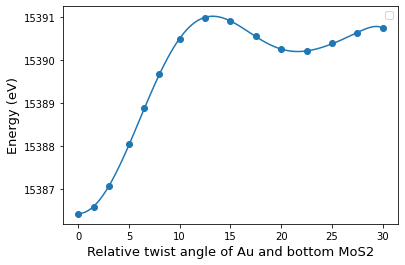

In [1448]:
#plt.figure(figsize=(10,6))
plt.xlabel('Relative twist angle of Au and bottom MoS2',fontsize=13)
plt.ylabel('Energy (eV)',fontsize=13)
plt.legend()

#read data
df = pd.read_csv("energy calculation/Nov. 5/MoS2-3DAu/plot.csv", header=None)
x = df.iloc[:,0]
y = df.iloc[:,1]
x = np.array([float(i) for i in x])
y = np.array([float(i) for i in y])
plt.scatter(np.array(x),np.array(y))

#fit the data to find E_interfacial f(x)
def fit(x,a0,a1,a2,a3,a4,a5,a6,a7,a8):
    return (a0+a1*np.cos(x/60)+a2*np.cos(2*x/60)+a3*np.cos(3*x/60)+a4*np.cos(4*x/60)+a5*np.cos(5*x/60)+a6*np.cos(6*x/60)+a7*np.cos(7*x/60)+a8*np.cos(8*x/60))
popt,pcov = curve_fit(fit,x,y)

#define E_interfacial, E'_interfacial, E_twist and E'_twist
m = 30
def f(x):
    return (popt[0]+popt[1]*np.cos(x/60)+popt[2]*np.cos(2*x/60)+popt[3]*np.cos(3*x/60)+popt[4]*np.cos(4*x/60)+popt[5]*np.cos(5*x/60)+popt[6]*np.cos(6*x/60)+popt[7]*np.cos(7*x/60)+popt[8]*np.cos(8*x/60))
def g(x):
    return (f(x)+f(m-x))

#plot
n = np.linspace(0,m,100)
plt.plot(n,f(n))

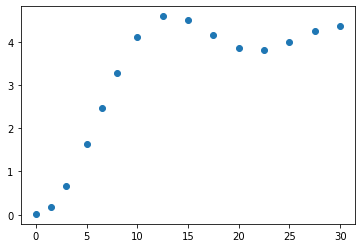

In [726]:
df = pd.read_csv("energy calculation/Nov. 5/MoS2-3DAu/plot.csv", header=None)
x = df.iloc[:,0]
y = df.iloc[:,1]
x = np.array([float(i) for i in x])
y = np.array([float(i) for i in y])
plt.scatter(np.array(x),np.array(y)-15386.4)

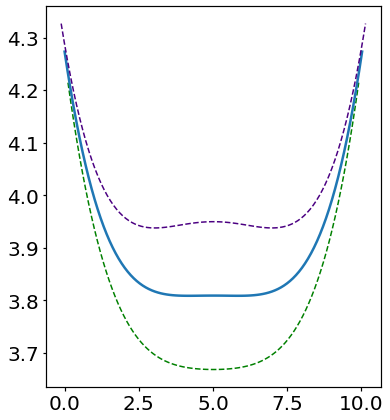

In [1447]:
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(6,7))
ax=plt.axes()
plt.tick_params(width=1.2,labelsize=20)
ax.spines['bottom'].set_linewidth('1.2')
ax.spines['top'].set_linewidth('1.2')
ax.spines['left'].set_linewidth('1.2')
ax.spines['right'].set_linewidth('1.2')
#ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.xlim((0.,4.))
#plt.ylim((3.8,4.8))

m1=9.5
m2=10.0
m3=10.5
x = np.linspace(0,m1,100)
y = np.linspace(0,m2,100)
z = np.linspace(0,m3,100)
plt.plot(x,f(x)+f(m1-x),'m--',color='green',linewidth=1.5)
plt.plot(y,f(y)+f(m2-y),color='#1f77b4',linewidth=2.5)
plt.plot(z,f(z)+f(m3-z),'m--',color='indigo',linewidth=1.5)
plt.savefig("E interfacial.svg", dpi=150)
#1f77b4